In [1]:
import pandas as pd
import sklearn.model_selection as ms
import sklearn.metrics as me
import xgboost as xgb

import matplotlib.pyplot as plt

plt.style.use('dark_background')

In [2]:
RANDOM_STATE = 42

In [3]:
stats = pd.read_csv("../Data/files/flights_subspace_stats.csv")
stats_test = pd.read_csv("../Data/files/flights_test_stats.csv")

In [4]:
# data sampling
stats_sample = stats.sample(frac=0.15, random_state=RANDOM_STATE)

In [5]:
rfc = xgb.XGBRFClassifier(use_label_encoder=False, random_state=RANDOM_STATE)

In [6]:
stats['is_delayed'] = stats['arr_delay'].apply(lambda delay: 1 if (delay > 0) else 0)

In [7]:
X_stats, y_stats = stats.drop(columns=['fl_date', 'is_delayed']), stats.is_delayed

In [8]:
print(X_stats.shape, y_stats.shape)

(2339962, 22) (2339962,)


In [9]:
stats_Xtrain, stats_Xtest, stats_ytrain, stats_ytest = ms.train_test_split(X_stats, y_stats, stratify=y_stats, test_size=0.3, random_state=RANDOM_STATE)

### Stats data

In [10]:
rfc.fit(stats_Xtrain.drop('arr_delay', axis=1), stats_ytrain)

[14:49:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBRFClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
                colsample_bytree=1, enable_categorical=False, gamma=0,
                gpu_id=-1, importance_type=None, interaction_constraints='',
                max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
                monotone_constraints='()', n_estimators=100, n_jobs=8,
                num_parallel_tree=100, objective='binary:logistic',
                predictor='auto', random_state=42, reg_alpha=0,
                scale_pos_weight=1, tree_method='exact',
                use_label_encoder=False, validate_parameters=1, verbosity=None)

In [11]:
stats_pred = rfc.predict(stats_Xtest.drop('arr_delay', axis=1))
train_stats_pred = rfc.predict(stats_Xtrain.drop('arr_delay', axis=1))

In [12]:
soft_from_stats = rfc.predict_proba(stats_Xtest.drop('arr_delay', axis=1))
train_soft_from_stats = rfc.predict_proba(stats_Xtrain.drop('arr_delay', axis=1))

In [13]:
print(me.classification_report(stats_ytest, stats_pred))

              precision    recall  f1-score   support

           0       0.66      0.97      0.79    455787
           1       0.57      0.09      0.15    246202

    accuracy                           0.66    701989
   macro avg       0.62      0.53      0.47    701989
weighted avg       0.63      0.66      0.56    701989



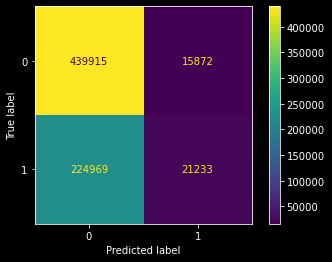

In [14]:
me.ConfusionMatrixDisplay.from_predictions(stats_ytest, stats_pred)

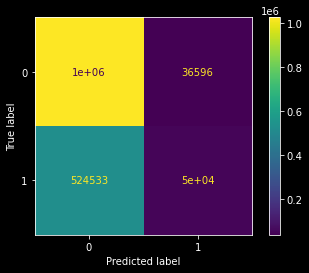

In [15]:
me.ConfusionMatrixDisplay.from_predictions(stats_ytrain, train_stats_pred)

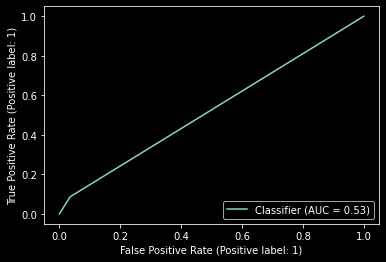

In [16]:
me.RocCurveDisplay.from_predictions(stats_ytest, stats_pred)

### Predictions

In [17]:
pred_stats_train = train_soft_from_stats[:, :1]
pred_stats_test = soft_from_stats[:, :1]

In [18]:
stats_Xtrain = stats_Xtrain.reset_index(drop=True)
stats_Xtest = stats_Xtest.reset_index(drop=True)

In [19]:
stats_Xtrain['stats_pred'] = pd.Series(pred_stats_train.reshape(-1))
stats_Xtest['stats_pred'] = pd.Series(pred_stats_test.reshape(-1))

In [20]:
X_to_save = pd.concat([stats_Xtrain, stats_Xtest])

In [21]:
X_to_save.stats_pred.value_counts(dropna=False)

0.621467    18274
0.423114     8305
0.623135     6362
0.621169     6196
0.619662     5870
            ...  
0.661334        1
0.644639        1
0.762763        1
0.656932        1
0.710076        1
Name: stats_pred, Length: 706848, dtype: int64

In [22]:
X_to_save.head()

,branded_code_share,crs_dep_time,crs_arr_time,crs_elapsed_time,distance,arr_delay,origin_airport_id_mean,origin_airport_id_median,dest_airport_id_mean,dest_airport_id_median,...,day_of_week_median,week_of_year_mean,week_of_year_median,tail_num_mean,tail_num_median,op_unique_carrier_mean,op_unique_carrier_median,mkt_unique_carrier_mean,mkt_unique_carrier_median,stats_pred
0,0,1000,1835,335.0,2565,87.0,6.297634,-6.0,18.862792,-3.0,...,-5.0,5.192664,-6.0,-1.452778,-5.0,0.367058,-6.0,0.645435,-6.0,0.599476
1,1,1345,1424,99.0,500,-3.0,2.734614,-7.0,4.033033,-6.0,...,-6.0,2.912060,-6.0,-0.328512,-11.0,3.516933,-10.0,2.421644,-8.0,0.733710
2,1,1220,1405,105.0,391,3.0,7.672142,-5.0,1.498925,-7.0,...,-7.0,5.981355,-6.0,0.955516,-7.5,7.113200,-7.0,2.421644,-8.0,0.674812
3,0,2120,2340,80.0,451,-4.0,2.127281,-7.0,6.327156,-4.0,...,-6.0,6.975293,-6.0,5.558870,-5.0,3.577572,-5.0,3.577572,-5.0,0.552997
4,0,1130,1730,240.0,1620,7.0,7.672142,-5.0,10.926134,-6.0,...,-5.0,9.774019,-4.0,-4.348974,-11.0,0.449845,-8.0,2.421644,-8.0,0.658946


In [32]:
cols_to_pred = (set(X_to_save.columns) - {'arr_delay', 'stats_pred'})

In [33]:
stats_test['stats_pred'] = rfc.predict_proba(stats_test[cols_to_pred])[:, :1]

In [34]:
stats_test['stats_pred'].value_counts(dropna=False)

0.591202    33707
0.591238    17693
0.712188    15333
0.586493    14642
0.592020    14318
0.593226    11732
0.587277     8734
0.725702     6808
0.724011     5535
0.725481     5241
0.714414     4927
0.580760     4225
0.723789     3311
0.581548     1871
0.721392     1726
0.721169      745
0.591756       48
0.722528       20
0.726396        2
0.590852        1
0.584893        1
0.712543        1
0.721469        1
0.720852        1
Name: stats_pred, dtype: int64

In [35]:
# Uncomment to save

# X_to_save.to_csv("../Data/files/stats.csv", index=False)
# stats_test.to_csv("../Data/files/stats_test.csv", index=False)